## Quick look at modules

In [1]:
%load_ext autoreload
%autoreload 2
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/home/alexandra/anaconda3/envs/core_acc_env/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
corr_threshold_list = [0.9, 0.8, 0.7, 0.6, 0.5]

for corr_threshold in corr_threshold_list:
    print(f"Modules using correlation threshold: {corr_threshold}")
    pao1_membership_filename = f"pao1_membership_{corr_threshold}.tsv"
    pa14_membership_filename = f"pa14_membership_{corr_threshold}.tsv"

    pao1_membership = pd.read_csv(
        pao1_membership_filename, sep="\t", header=0, index_col=0
    )
    pa14_membership = pd.read_csv(
        pa14_membership_filename, sep="\t", header=0, index_col=0
    )

    print(pao1_membership["module id"].value_counts())
    print(pa14_membership["module id"].value_counts())

Modules using correlation threshold: 0.9
0.0    4530
1.0     244
2.0     170
3.0     149
4.0     127
5.0     106
6.0      84
7.0      70
8.0      51
9.0      32
Name: module id, dtype: int64
0.0    5192
1.0     391
2.0     120
3.0      81
4.0      37
6.0      35
5.0      35
Name: module id, dtype: int64
Modules using correlation threshold: 0.8
0.0     3165
1.0     1060
2.0      536
3.0      197
4.0      120
5.0       82
6.0       75
7.0       49
8.0       42
9.0       38
10.0      36
11.0      35
12.0      34
13.0      32
14.0      32
15.0      30
Name: module id, dtype: int64
0.0     3600
1.0      828
2.0      191
3.0      116
4.0       82
6.0       80
5.0       80
7.0       72
8.0       66
9.0       65
10.0      62
11.0      59
13.0      46
12.0      46
14.0      44
15.0      44
18.0      42
16.0      42
17.0      42
19.0      40
20.0      38
21.0      37
22.0      36
23.0      36
24.0      34
25.0      32
26.0      31
Name: module id, dtype: int64
Modules using correlation threshold

In [17]:
# plotting function
def plot_dist_modules(threshold_list):

    # Set up the matplotlib figure
    fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(15, 15))
    axes = axes.ravel()

    for i in range(len(threshold_list)):
        pao1_membership_filename = f"pao1_membership_{threshold_list[i]}.tsv"
        pa14_membership_filename = f"pa14_membership_{threshold_list[i]}.tsv"

        pao1_membership = pd.read_csv(
            pao1_membership_filename, sep="\t", header=0, index_col=0
        )
        pa14_membership = pd.read_csv(
            pa14_membership_filename, sep="\t", header=0, index_col=0
        )

        # Get bins using all data
        hist, bins_corr = np.histogram(
            np.concatenate([pao1_membership["module id"], pa14_membership["module id"]])
        )

        # Distribution plot for core genes
        fig = sns.distplot(
            pao1_membership["module id"],
            label="PAO1 modules",
            color="red",
            bins=bins_corr,
            kde=False,
            ax=axes[i],
        )

        fig = sns.distplot(
            pa14_membership["module id"],
            label="PA14 modules",
            color="blue",
            bins=bins_corr,
            kde=False,
            ax=axes[i],
        )

        fig.set_title(
            f"Histogram of size of modules using threshold {threshold_list[i]}",
            fontsize=12,
        )
        handles, labels = fig.get_legend_handles_labels()
        fig.legend(handles, labels, loc="center right")

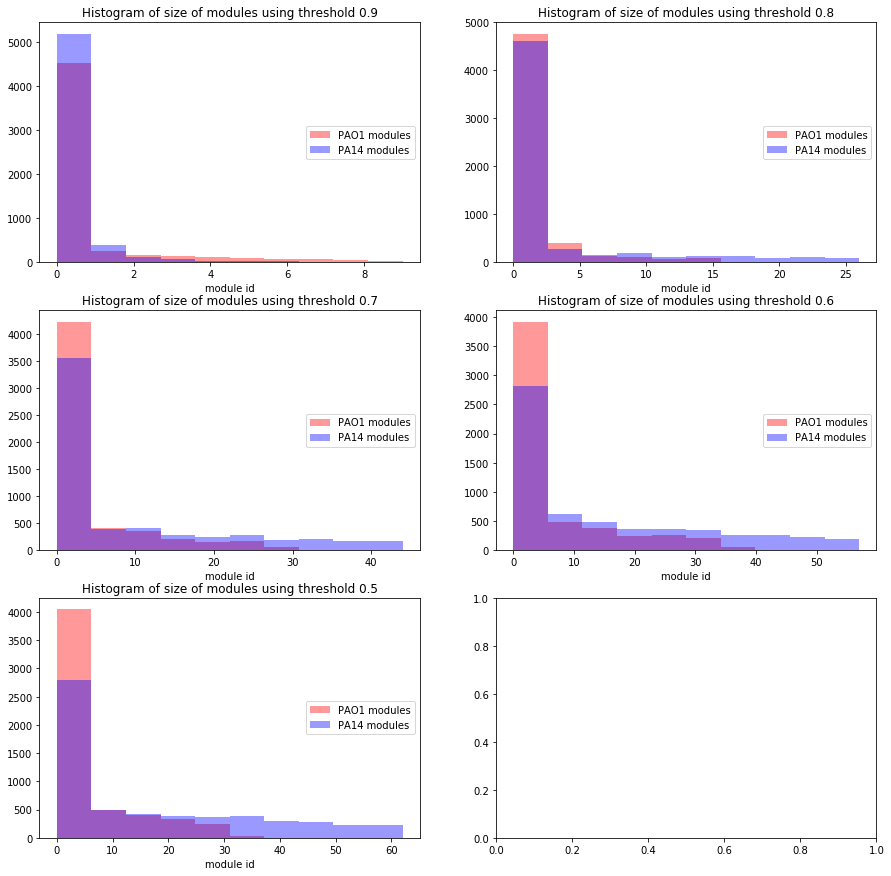

In [18]:
# Plot distribution of modules per threshold
plot_dist_modules(corr_threshold_list)